# Employee Database Analysis (Bonus)
----

#### Note
* Import the SQL database into Pandas.
* Create a histogram to visualize the most common salary ranges for employees.
* Create a bar chart of average salary by title.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as sts
from config import engine, connection

In [19]:
# Read each SQL table into dataframes
departments = pd.read_sql('SELECT * FROM departments', connection)
dept_emp = pd.read_sql('SELECT * FROM dept_emp', connection)
dept_managers = pd.read_sql('SELECT * FROM dept_managers', connection)
employees = pd.read_sql('SELECT * FROM employees', connection)
salaries = pd.read_sql('SELECT * FROM salaries', connection)
titles = pd.read_sql('SELECT * FROM titles', connection)

In [20]:
# Get salary dataframe
salary_df = pd.read_sql("SELECT * FROM salaries", connection)
salary_df = salary_df.dropna()
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


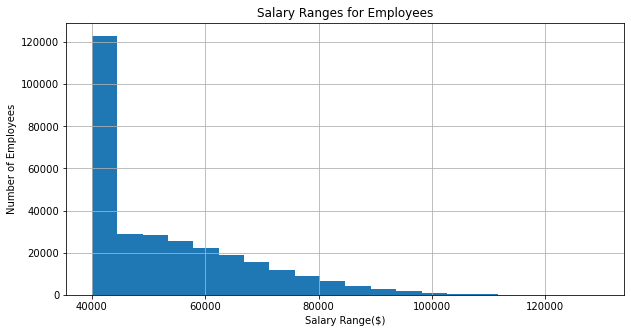

In [31]:
# Create a histogram to visualize the most common salary ranges for employees.
histogram = salary_df.hist(column = 'salary', bins=20, figsize = (10,5))

plt.title("Salary Ranges for Employees")
plt.xlabel("Salary Range($)")
plt.ylabel("Number of Employees")
plt.savefig("Images/histogram_salary.png")

In [32]:
# Get title dataframe
title_df = pd.read_sql("SELECT * FROM titles", connection)
title_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [33]:
# Merge dataframes to get salary and title relationships and get average salary
salary_title = salaries.merge(employees, on="emp_no").merge(titles, left_on="emp_title_id", right_on="title_id")
avg_salary = salary_title[["title", "salary"]].groupby(by="title").mean().reset_index()
avg_salary.head()


,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


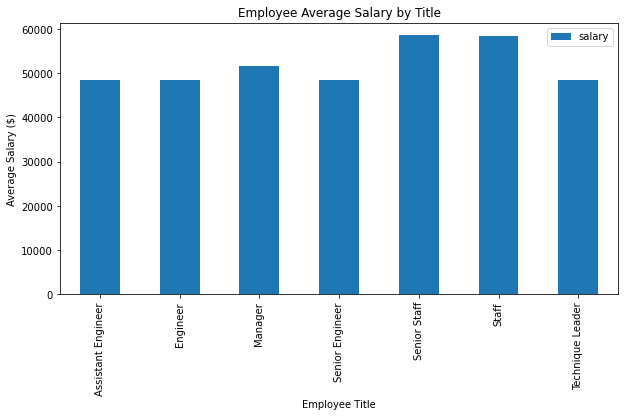

In [34]:
# Create a bar chart of average salary by title.
avg_salary.plot.bar(x="title", y="salary", figsize=(10,5))
plt.title("Employee Average Salary by Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary ($)")
plt.savefig("Images/barchart_avgsalary.png")
plt.show()